In [17]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Features_ManualRS.csv')

In [18]:
df = df[df['ContourType'] == 'Manual']
df = df[df['Feature'].isin(['shape_MeshVolume', 'firstorder_Median'])]
df = df[['PatID','Fraction','Feature','FeatureValue']]
df.sample(10)

,PatID,Fraction,Feature,FeatureValue
1807,1089,3,firstorder_Median,0.328571
8303,826,5,shape_MeshVolume,0.154633
4327,1302,2,firstorder_Median,0.542857
2857,1088,3,firstorder_Median,0.114286
10298,1303,4,shape_MeshVolume,0.328287
4117,1553,5,firstorder_Median,0.385714
9787,1431,4,firstorder_Median,0.728571
7778,1307,5,shape_MeshVolume,0.184873
8212,826,4,firstorder_Median,0.271429
7687,1307,4,firstorder_Median,0.528571


In [19]:
df_signal = df[df['Feature'] == 'firstorder_Median']
df_signal = df_signal[['PatID','Fraction','FeatureValue']]
df_signal = df_signal.rename(columns={'FeatureValue': 'Signal'})

df_volume = df[df['Feature'] == 'shape_MeshVolume']
df_volume = df_volume[['PatID','Fraction','FeatureValue']]
df_volume = df_volume.rename(columns={'FeatureValue': 'Volume'})


In [22]:
df_plot = pd.merge(df_signal, df_volume, on=['PatID','Fraction'])
df_plot = df_plot.melt(id_vars=['PatID','Fraction'], var_name='Feature', value_name='Value')
# rename to Signal and Volume
df_plot['Feature'] = df_plot['Feature'].replace({'Signal': 'MedianSignal', 'Volume': 'Volume'})

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  


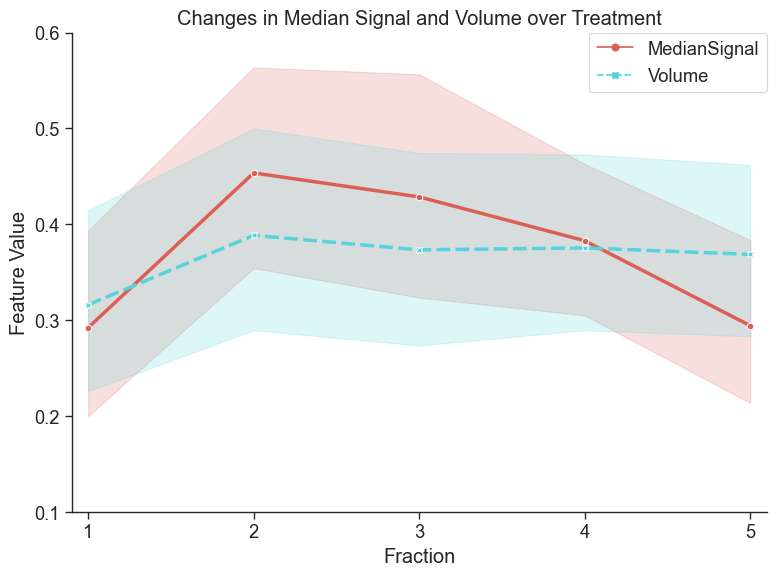

In [99]:
# plot using matplotlib

fig, ax = plt.subplots(figsize=(8, 6))
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style('ticks')
sns.despine()

sns.lineplot(data=df_plot, x='Fraction', y='Value', hue='Feature', ax=ax, ci=95, legend='full', palette='hls', linewidth=2.5, markers=True, style='Feature', estimator=np.mean)#, err_style='bars', err_kws={'elinewidth': 1.5, 'capsize': 3, 'capthick': 1.5})
ax.set_xlabel('Fraction')
ax.set_ylabel('Feature Value')
ax.set_title('Changes in Median Signal and Volume over Treatment')
ax.legend(loc='upper right', borderaxespad=0.)
ax.set_xlim(0.9, 5.1)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['1', '2', '3', '4', '5'])
ax.set_ylim(0.1, 0.6)
# pad title, move up

plt.tight_layout()
plt.savefig('C:/Users/b01297ar/Documents/ProstateMRL-local/ProstateMRL-Radiomics/Paper1-Release/Visualisation/LinePlotSignalVolume.png', dpi=300)

plt.show()


In [80]:
df_signal = df_plot[df_plot['Feature'] == 'MedianSignal']
df_signal = df_signal[['PatID','Fraction','Value']]
df_signal_l = df_signal.copy()
df_signal_d = df_signal.loc[df_signal['Fraction'].isin([1, 5])]

In [82]:
# get random patients
patIDs = df_signal['PatID'].unique()
rand_pats = np.random.choice(patIDs, 3, replace=False)
print(rand_pats)

[1089  829 1642]


In [92]:
df_signal_d['Model'] = 'Delta'
df_signal_l['Model'] = 'Longitudinal'
df_plt2 = df_signal_d.append(df_signal_l)
df_plt2 = df_plt2[df_plt2['PatID'].isin(rand_pats)]
# sort reverse order bu mode;
df_plt2 = df_plt2.sort_values(by=['Model'], ascending=False)

c:\Users\b01297ar\Documents\ProstateMRL-local\ProstateMRL-Radiomics\envPR\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Fraction', ylabel='Value'>

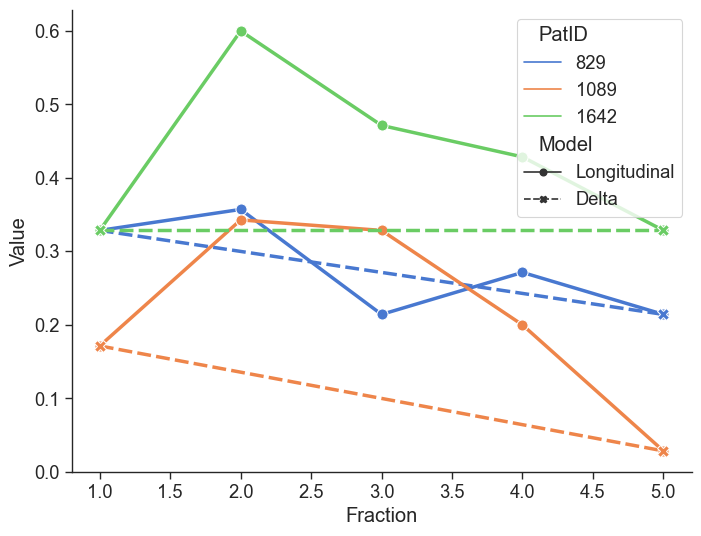

In [94]:
# plot using matplotlib signal
fig, ax = plt.subplots(figsize=(8, 6))
# custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_style('ticks')
sns.despine()
# only want legend for model
sns.lineplot(data=df_plt2.loc[df_plt2['PatID'].isin(rand_pats)], x='Fraction', y='Value', hue='PatID', ax=ax, 
palette='muted', linewidth=2.5, markers=True, marker='o', markersize=8, style='Model', legend=''